In [ ]:
from datacube_ows.styles.api import plot_image_with_style_cfg

from pystac.client import Client
from odc.stac import load

In [ ]:
from ows_config.elevation.ows_intertidal import style_blues, style_exposure

In [ ]:
catalog = "https://stac.staging.digitalearthpacific.io"
collection = "dep_s2ls_intertidal"

client = Client.open(catalog)

# bbox = [-178.4803748131407, -18.56384238396279, -178.4539389610779, -18.53743868386896]

lon = [177.23472, 177.28915]
lat = [-17.95643, -17.93334]

# western fiji bbox
bbox = [lon[0], lat[0], lon[1], lat[1]]

items = client.search(collections=[collection], bbox=bbox).item_collection()

print(f"Found {len(items)} items")

In [ ]:
from odc.stac import configure_s3_access
 
configure_s3_access(aws_unsigned=True)
 
    
data = load(items, bbox=bbox, groupby="solar_day").compute()
data

In [ ]:
plot_image_with_style_cfg(style_blues, data)
plot_image_with_style_cfg(style_exposure, data)

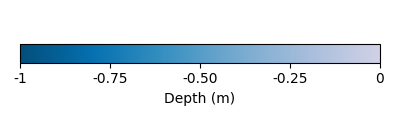

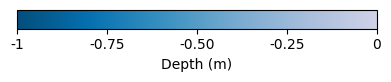

In [3]:
from datacube_ows.styles.api import generate_ows_legend_style_cfg

style_elevation = {
    "name": "Elevation",
    "title": "Elevation",
    "abstract": "Elevation",
    "needed_bands": ["elevation"],
    "index_function": {
        "function": "datacube_ows.band_utils.single_band",
        "mapped_bands": True,
        "kwargs": {
            "band": "elevation",
        },
    },
    "color_ramp": [
        {"value": -1.0, "color": "#034e7b"},
        {"value": -0.8, "color": "#0570b0"},
        {"value": -0.6, "color": "#3690c0"},
        {"value": -0.4, "color": "#74a9cf"},
        {"value": -0.2, "color": "#a6bddb"},
        {"value": -0.0, "color": "#d0d1e6"},
        # {"value": -0, "color": "#f1eef6", "alpha": 0.0},
    ],
    "legend": {
        "title": "Depth ",
        "begin": "-1",
        "end": "0",
        "ticks_every": 0.25,
        "units": "m",
    },
}

# Note this command will also display the legend in a JupyterHub/notebook-type environment)
generate_ows_legend_style_cfg(style_elevation)